### Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Stats and distributions
import scipy.stats as stats

### Import Data

In [2]:
df_half_2 = pd.read_csv('kc_house_data.csv')

We are going to divide and conquer doing detailed EDA on the variables. Hussein will do the first 11 and I will do the rest.

In [3]:
#Make sure there are 21 columns
df_half_2.shape

(21597, 21)

In [4]:
# Find last 10 columns
cols_eda_2 = [col for col in df_half_2.columns]
cols_eda_2 = cols_eda_2[11:]
cols_eda_2

['grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [5]:
# I also want price so can do scatter matrix
cols_eda_2.append('price')
cols_eda_2

['grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'price']

In [6]:
# Now let's reduce down the dataset for convenience
df_eda_2 = df_half_2.loc[:,cols_eda_2]
df_eda_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
price            21597 non-null float64
dtypes: float64(4), int64(6), object(1)
memory usage: 1.8+ MB


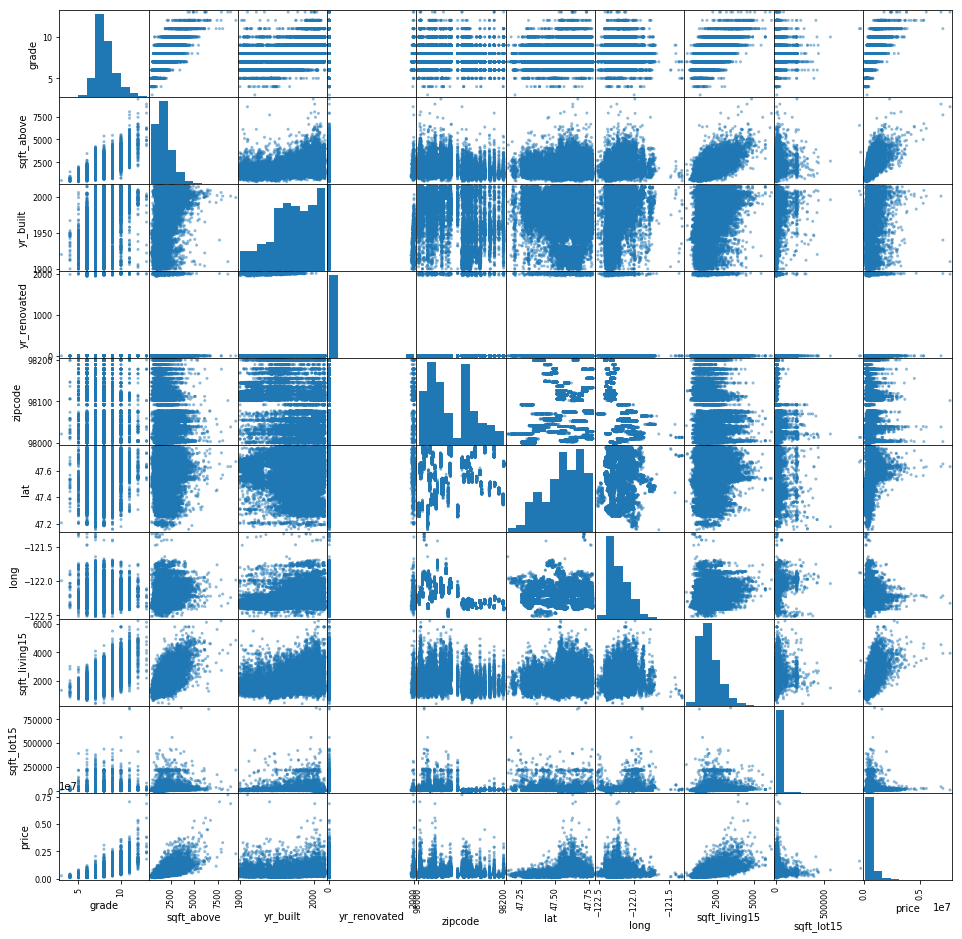

In [7]:
# Create scatter matrix
_ = pd.plotting.scatter_matrix(df_eda_2,figsize=(16,16))

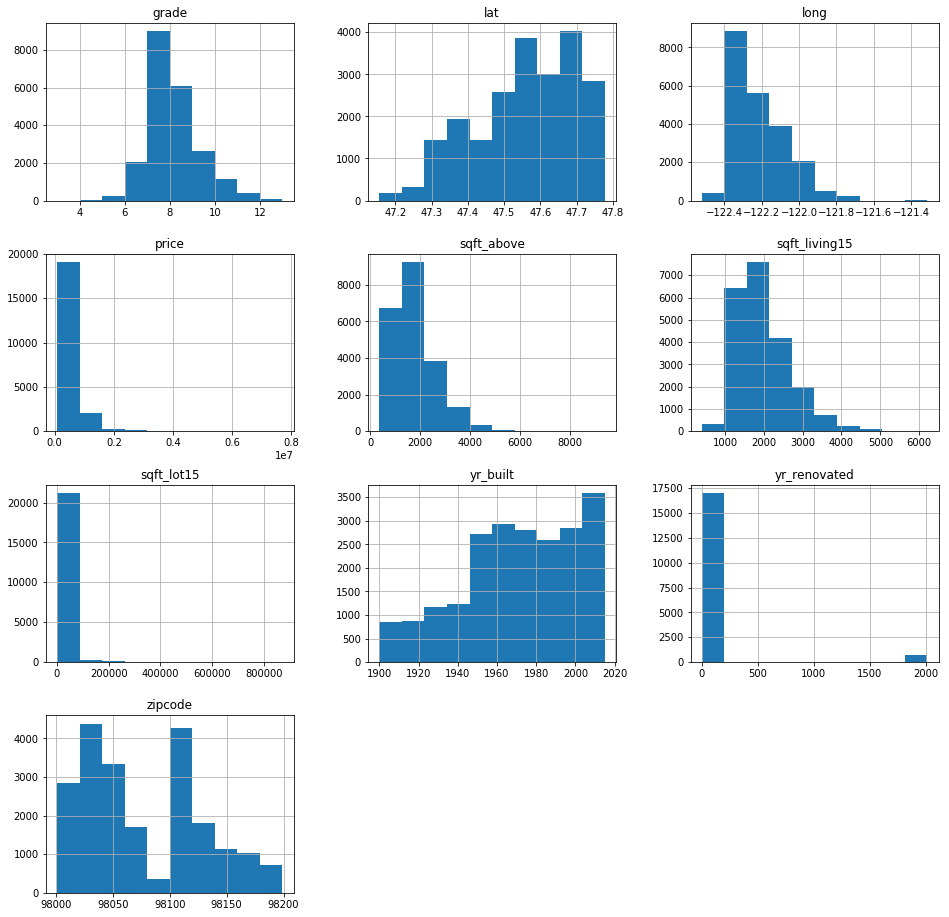

In [8]:
# Create histograms
_ = df_eda_2.hist(figsize=(16,16))

One last thing I might do is log transform price to see if that changes relationship with potential predictors.

In [9]:
df_eda_2['log_price'] = df_eda_2['price'].apply( np.log )

In [10]:
df_eda_2.head()

grade  sqft_above sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0      7        1180           0.0      1955           0.0    98178  47.5112   
1      7        2170         400.0      1951        1991.0    98125  47.7210   
2      6         770           0.0      1933           NaN    98028  47.7379   
3      7        1050         910.0      1965           0.0    98136  47.5208   
4      8        1680           0.0      1987           0.0    98074  47.6168   

      long  sqft_living15  sqft_lot15     price  log_price  
0 -122.257           1340        5650  221900.0  12.309982  
1 -122.319           1690        7639  538000.0  13.195614  
2 -122.233           2720        8062  180000.0  12.100712  
3 -122.393           1360        5000  604000.0  13.311329  
4 -122.045           1800        7503  510000.0  13.142166

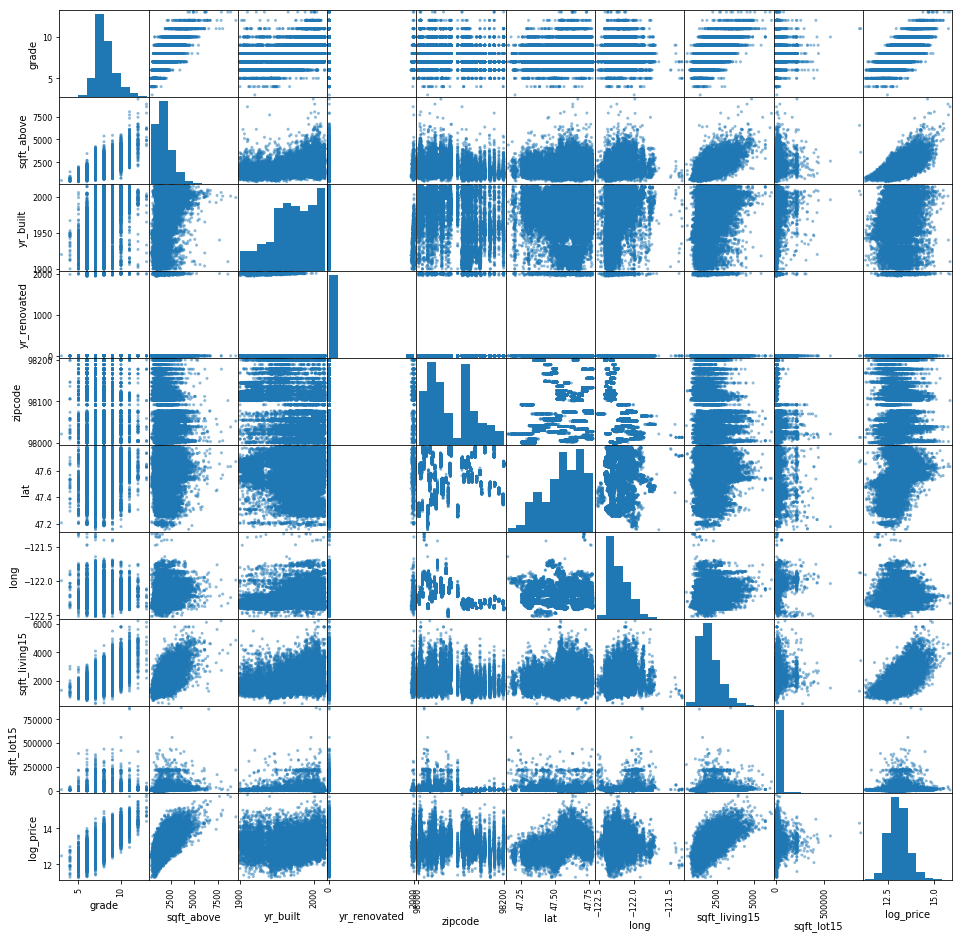

In [12]:
# Create scatter matrix
_ = pd.plotting.scatter_matrix(df_eda_2.drop(['price'],axis=1),figsize=(16,16))

When took the log of `price` it seems to show more linear realtions ships with many of my variables. So I think will recommend that we use `log_price` as our target variable.

### Initial observations and recommendations

- `grade` 
    - Appears to have linear relationship with, as well as being normally distributed 
    - No nulls
    - We confirmed that the King County scale is from 1-13.
    - <font color ="green">KEEP</font>
- `sqft_above`
    - No nulls
    - Appears to have linear relationship. Not normally distributed, but not sure if that's needed. 
    - <font color ="green">KEEP</font>
- `yr_built`
    - No nulls
    - After transformation of price it appears to have a linear relationship.
    - <font color ="green">KEEP</font>
- `sqft_basement`
    - Didn't get into the plots! Because it was an object. This was driven by `?` characters that were present in the column. Our initial idea is to transform it by assuming it is the difference between `sqft_totliving` and `sqft_above`. 
    - So we transformed the entire column by assuming as such:
            ` sqft_basement = sqft_totliving - sqft_above`
    - <font color ="red">NEED TO TRANSFORM</font>
- `yr_renovated`
    - There are a large number of nulls. We believe that it means that the house has not been renovated yet. There are also a large number with `0` entered, which we believe means the same thing. So for consistency of data we will transform the nulls all into `0`s.
    - <font color ="red">NEED TO TRANSFORM, replace `NaN` with 0</font>
- `zip code`
    - No nulls
    - But they are all `ints`. May need to scrub for zip+4. Also, think zip code should be considered to be more of a categorical variable. So think need to do two things:
    - 1. convert to `str`
    - 2. Truncate to 5 characters - (We confirmed it is!)
    - <font color ="red">NEED TO TRANSFORM</font>
- `lat` and `long`
    - No nulls
    - This appears to be very clean, with the caveat that some coordinates *may* fall out of King County.
    - <font color ="green">KEEP, but might want to see on a map</font>
- `sqft_living15`, `sqft_lot15`
    - No nulls
    - Distribution based on inspection of histogram seems reasonable.
    - <font color ="green">KEEP, for now</font>
    
    

        
    